Name: Bhargavi Poyekar

Class: BE COMPS

Batch: B

UID: 2018130040

# Lab 6: Time Series Forecasting: Data, Analysis, and Practice


**Objective**: To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting

This notebook contains Time Series Analysis on Google Stocks data, decomposition of time series into its components such as trend, seasonality. It also explores stationarity of time series and autocorrelation

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams

from prettytable import PrettyTable

import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creating Time Series Data

In [ ]:
google_data = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp6/GOOGL_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates =['Date'])
google_data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


The required time series column is imported as a datetime column using parse_dates parameter and is also selected as index of the dataframe using index_col parameter.

## Column Description

1. Open - Price at which a stock began trading for the time period
2. High - Maximum price of the stock in given time period
3. Low - Minimum price of the stock in the given time period
4. Close - Price at which a stock ended trading for the time period
5. Volume - Total amount of trading activity

In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [ ]:
google_data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


# Data Cleaning

In [ ]:
# Count of null values in each column
google_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

There are no null values present in this dataset

In [ ]:
# fig=px.line(google_data, x=google_data.index, y='High', title='Humidity with Slider')
# fig.update_xaxes(rangeslider_visible=True)
# fig.show()

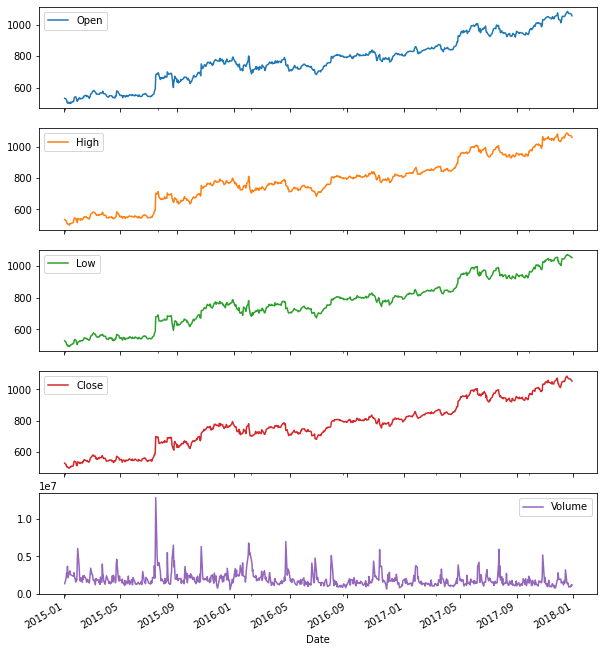

In [ ]:
# plt.title('Google Stock Attributes from 2008 to 2010')
google_data['2015':'2017'].plot(subplots=True, figsize=(10,12))
plt.show()

The above plot shows the status of variables over the period of 2 years.

We can see that the prices for Open, High, Low and Close for the google stock are overall increasing with the time. But there are still some valleys due to the seasonality component of the time series.

The volume of the stock is not having fluctuation in the same range over the time.

## Percent Change

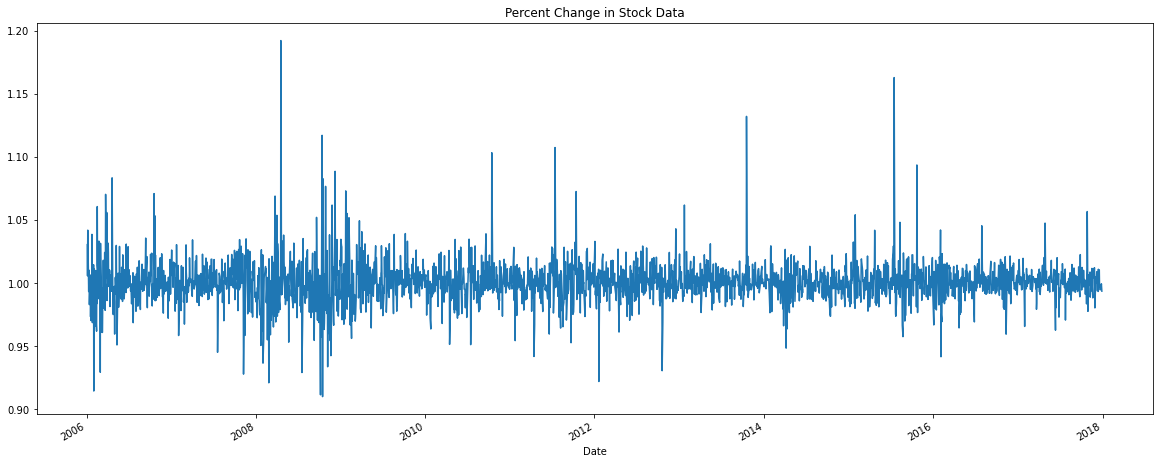

In [ ]:
google_data['Change'] = google_data.High.div(google_data.High.shift())
google_data['Change'].plot(figsize=(20,8))
plt.title('Percent Change in Stock Data')
plt.show()

In [ ]:
google_data['Change'].describe()

count    3018.000000
mean        1.000652
std         0.016122
min         0.910003
25%         0.993715
50%         1.000509
75%         1.007657
max         1.192293
Name: Change, dtype: float64

The percent change in High stock prices over the time have some spikes but otherwise it varies in the same range.

## Analysis of two Time Series

In [ ]:
microsoft_data = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp6/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
microsoft_data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08


# Data Cleaning

In [ ]:
# Count of null values in each column
microsoft_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

There are no null values present in this dataset

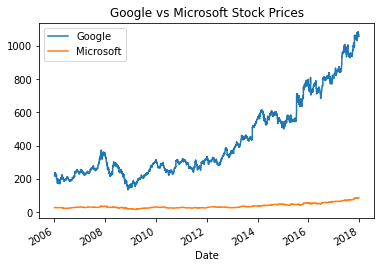

In [ ]:
# Plotting before normalization
google_data.High.plot()
microsoft_data.High.plot()
plt.legend(['Google','Microsoft'])
plt.title("Google vs Microsoft Stock Prices")
plt.show()

The above plot shows that the increase in stock prices of Google is more than the Microsoft. We can clearly see how Google outperforms Microsoft over time

# Time Series Decomposition

These are the components of a time series

1. Trend - Consistent upwards or downwards slope of a time series
2. Seasonality - Clear periodic pattern of a time series(like sine funtion)
3. Noise - Outliers or missing values

## Google Stock Data - Open

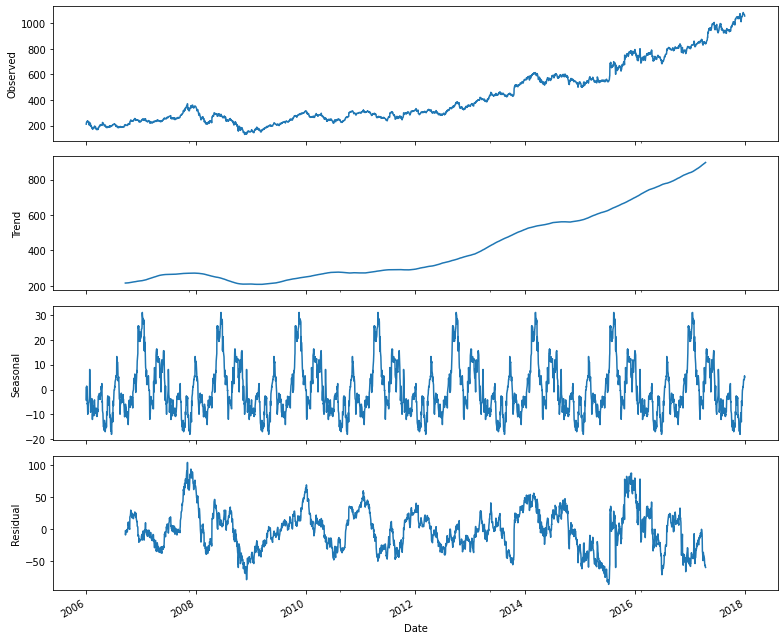

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_open = seasonal_decompose(google_data["Open"], freq=360) # The frequncy is annual
figure = decomposed_google_open.plot()
plt.show()

The above graph shows the components of the time series for Google Stock Open Price after decomposition. The trend component is increasing with the time. The sesonality component also follows a particular pattern. The seasonal component changes slowly over time, so that any two consecutive years have similar patterns, but years far apart may have different seasonal patterns. The residual component also has significant values.

# Stationarity

The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

## Visual Test

In [ ]:
google_data

,Open,High,Low,Close,Volume,Name,Change
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157
...,...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL,0.994617
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL,0.997331
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL,0.999448


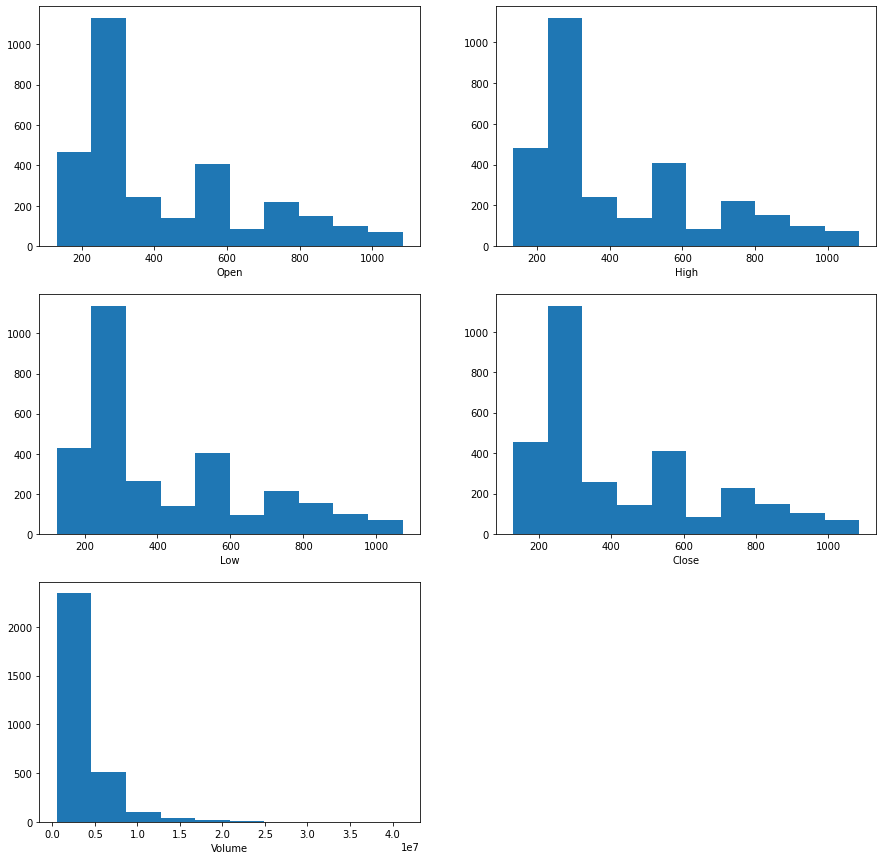

In [ ]:
plt.figure(figsize=(15,15))
cols = ['Open', 'High','Low', 'Close', 'Volume']
for i in range(0,len(cols)):
    plt.subplot(len(cols)//2+1,2,i+1)
    plt.hist(google_data[cols[i]]);
    plt.xlabel(cols[i])

The plot shows a slightly skewed distribution. The histogram doesn’t show normal distribution over a period of time.

From the above plots, we can conclude the time series data is non-stationary.

## Summary Statistics

In [ ]:
# Split the data
split = round(len(google_data) / 2)
X1, X2 = google_data[0:split], google_data[split:]

In [ ]:
stats_table = PrettyTable(['Variable', 'Mean-1', 'Mean-2', 'Variance-1', 'Variance-2'])
for col in cols:
    stats_table.add_row([col, round(X1[col].mean(),4), round(X2[col].mean(),4), round(X1[col].var(),4), round(X2[col].var(),4)])
print(stats_table)

+----------+--------------+--------------+--------------------+-------------------+
| Variable |    Mean-1    |    Mean-2    |     Variance-1     |     Variance-2    |
+----------+--------------+--------------+--------------------+-------------------+
|   Open   |   247.0147   |   609.5069   |     2135.5765      |     43865.7506    |
|   High   |   249.7543   |   614.0376   |     2122.0891      |     44360.0312    |
|   Low    |   243.9549   |   604.425    |     2131.0638      |     43285.0848    |
|  Close   |   246.8143   |   609.3938   |     2128.6487      |     43862.9594    |
|  Volume  | 5013457.8132 | 2088580.4347 | 12980195753162.592 | 1207905013137.745 |
+----------+--------------+--------------+--------------------+-------------------+


Looking at the above results the mean and variance of the first part is very different from the second part. It shows another indication of non-stationary time series data.

# Autocorrelation

**Autocorrelation** - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

**Partial Autocorrelation** - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

Autocorrelation is a powerful analysis tool for modeling time series data. As the name suggests, it involves computing the correlation coefficient. But here, rather than computing it between two features, correlation of a time series is found with a lagging version of itself.

## Autocorrelation for Google Stocks Data - Open

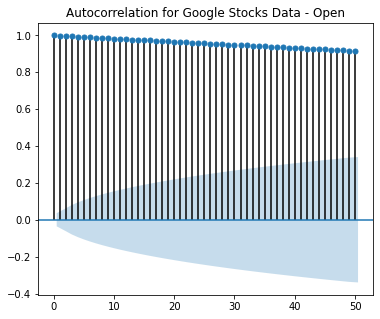

In [ ]:
rcParams['figure.figsize'] = 6, 5
plot_acf(google_data["Open"],lags=50)
plt.title('Autocorrelation for Google Stocks Data - Open')
plt.show()

The autocorrelation value for Open prices of google stocks decreases with increase in lag. Upto 50 lags, the autocorrelatin value is still greater than 0.8. As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

## Partial Autocorrelation for Google Stocks Data - Open

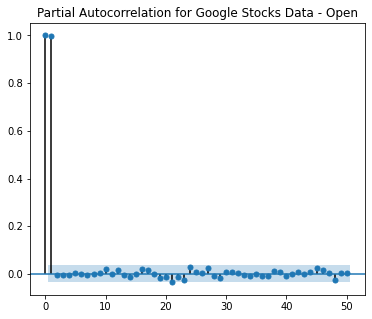

In [ ]:
plot_pacf(google_data['Open'],lags=50, method='ywm')
plt.title('Partial Autocorrelation for Google Stocks Data - Open')
plt.show()

The values of partial autocorrelation for Open price of google data is close to 1 for first 2 lags and after that it is very low.

# Inference

1. The time series analysis of Google Stocks data shows that the stock value contains increasing trend component. 
2. The stock values are increasing over the period hence this stock is profitable.
3. The increase in stock values of Microsoft is lesser compared to Google Stock.
4. The visual test using histrograms and statistical test using mean and variance showed the google stock data is not a stationary time series.
5. The autocorrelation of google stock data suggests that it is statistically significant as the autocorrelation values lie outside of the confidence interval.